In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

https://stackoverflow.com/questions/78605347/fitting-a-set-of-data-to-a-second-order-kinetic-rate-scheme-in-python/78605506#78605506

In [2]:
def kinetic(t, y, k):
    return np.array([
        - k * y[0] * y[1],  # [P]
        - k * y[0] * y[1],  # [R]
        + k * y[0] * y[1]   # [AB]
    ])

In [3]:
k = 1.345e-1
tlin = np.linspace(0, 10, 200)

In [12]:
sol = integrate.solve_ivp(kinetic, [tlin.min(), tlin.max()], y0=[1., 1., 0.], t_eval=tlin, args=(k,))
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.025e-02 ...  9.950e+00  1.000e+01]
        y: [[ 1.000e+00  9.933e-01 ...  4.280e-01  4.267e-01]
            [ 1.000e+00  9.933e-01 ...  4.280e-01  4.267e-01]
            [ 0.000e+00  6.713e-03 ...  5.720e-01  5.733e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0

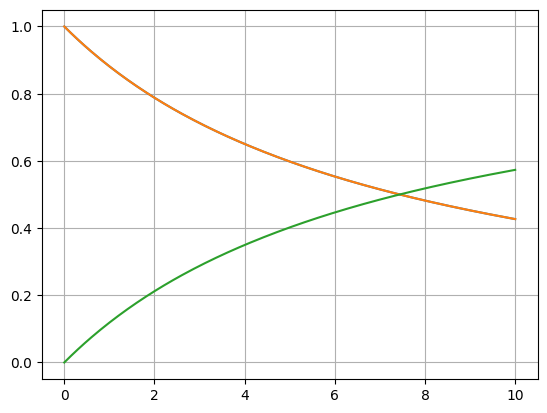

In [13]:
fig, axe = plt.subplots()
axe.plot(sol.t, sol.y.T)
axe.grid()

In [18]:
def model(t, k):
    sol = integrate.solve_ivp(kinetic, [t.min(), t.max()], y0=[1., 1., 0.], t_eval=t, args=(k,))
    return sol.y[-1,:]

In [25]:
t = np.array([0, 1, 1.25, 2.5, 3.75, 5, 6.25, 7.5, 8.75, 10])
C = np.array([0, 0.041355887, 0.228856274, 0.283712222, 0.401528071, 0.450842768, 0.514348728, 0.550876642, 0.61845291, 0.663312161])

In [26]:
popt, pcov = optimize.curve_fit(model, t, C)
popt, pcov

(array([0.17119482]), array([[0.00011828]]))

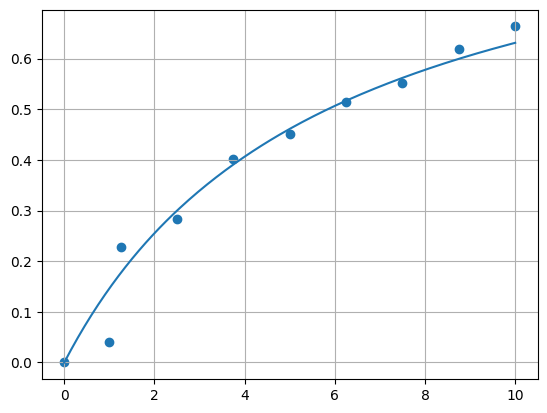

In [11]:
fig, axe = plt.subplots()
axe.scatter(t, C)
axe.plot(tlin, model(tlin, *popt))
axe.grid()